## Validate NSFG data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import math

import matplotlib.pyplot as plt

import thinkstats2
import thinkplot
from thinkstats2 import Cdf

import survival
import marriage

Validating the 1982 data:

In [2]:
resp3 = marriage.ReadFemResp1982()
marriage.Validate1982(resp3)
resp3.shape

(7969, 24)

In [3]:
resp3.head()

,finalwgt,ageint,mar2p,cmmarrhx,fmarital,cmintvw,cmbirth,f18m1,cmdivorcx,cmstphsbx,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,59452,25,NaN,NaN,6,997,690,NaN,NaN,NaN,...,False,False,3,NaN,25.583333,False,57,25.0,NaN,50
1,16147,27,2258.0,944.0,5,997,673,5.0,NaN,NaN,...,False,False,3,22.583333,27.000000,False,56,27.0,22.0,50
2,14618,39,2450.0,819.0,1,997,525,NaN,NaN,NaN,...,False,True,3,24.500000,39.333333,False,43,39.0,24.0,40
3,24772,26,NaN,NaN,6,993,681,NaN,NaN,NaN,...,False,False,3,NaN,26.000000,False,56,26.0,NaN,50
4,66226,17,NaN,NaN,6,997,790,NaN,NaN,NaN,...,False,False,3,NaN,17.250000,False,65,17.0,NaN,60


In [4]:
sum(resp3.fmarno.isnull())

3148

In [5]:
resp3.fmarno.value_counts().sort_index()

fmarno
0.0     170
1.0    3953
2.0     612
3.0      77
4.0       5
5.0       2
8.0       2
Name: count, dtype: int64

In [6]:
resp3.widowed.value_counts()

widowed
False    7850
True      119
Name: count, dtype: int64

In [7]:
sum(resp3.cmdivorcx.isnull()), 6841+29+5+56

(6931, 6931)

In [8]:
sum((resp3.cmdivorcx >= 400) & (resp3.cmdivorcx <= 948)), 583+128

(711, 711)

In [9]:
sum((resp3.cmdivorcx >= 949) & (resp3.cmdivorcx <= 1000)), 311+16

(327, 327)

In [10]:
sum(resp3.cmstphsbx.isnull()), 7571+1+6+31

(7609, 7609)

In [11]:
sum((resp3.cmstphsbx >= 400) & (resp3.cmstphsbx <= 948)), 125+33

(158, 158)

In [12]:
sum((resp3.cmstphsbx >= 949) & (resp3.cmstphsbx <= 1000)), 197+5

(202, 202)

In [13]:
sum(resp3.divorced)

1122

In [14]:
sum(~resp3.cmstphsbx.isnull())

360

In [15]:
sum(~resp3.cmdivorcx.isnull())

1038

Validating the 1988 data:

In [16]:
resp4 = marriage.ReadFemResp1988()
marriage.Validate1988(resp4)
resp4.shape

(8450, 24)

In [17]:
resp4.fmarno.describe()

count    8450.000000
mean        0.761183
std         0.711908
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fmarno, dtype: float64

In [18]:
resp4.fmarno.value_counts().sort_index()

fmarno
0    3160
1    4325
2     829
3     108
4      15
5      13
Name: count, dtype: int64

In [19]:
resp4.evrmarry.value_counts().sort_index()

evrmarry
False    3160
True     5290
Name: count, dtype: int64

In [20]:
resp4.separated.value_counts().sort_index()

separated
False    8120
True      330
Name: count, dtype: int64

In [21]:
resp4.head()

,finalwgt,ageint,currentcm,firstcm,cmintvw,cmbirth,f23m1,cmdivorcx,cmstphsbx,fmarno,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,713792,28,NaN,NaN,1061,723,NaN,NaN,NaN,0,...,False,False,4,NaN,28.166667,False,60,28.0,NaN,60
1,367022,37,NaN,NaN,1059,614,NaN,NaN,NaN,0,...,False,False,4,NaN,37.083333,False,51,37.0,NaN,50
2,975924,21,NaN,NaN,1057,796,NaN,NaN,NaN,0,...,False,False,4,NaN,21.750000,False,66,21.0,NaN,60
3,587796,39,NaN,838.0,1057,581,2.0,943.0,NaN,1,...,False,False,4,21.416667,39.666667,False,48,39.0,21.0,40
4,719633,31,974.0,882.0,1062,683,2.0,930.0,NaN,2,...,False,False,4,16.583333,31.583333,False,56,31.0,16.0,50


In [22]:
sum(resp4.cmdivorcx.isnull()), 6897+77

(6974, 6974)

In [23]:
sum((resp4.cmdivorcx >= 685) & (resp4.cmdivorcx <= 1008)), 903+152

(1055, 1055)

In [24]:
sum((resp4.cmdivorcx >= 1009) & (resp4.cmdivorcx <= 1064)), 399+22

(421, 421)

In [25]:
sum(resp4.cmstphsbx.isnull()), 8113+29

(8142, 8142)

In [26]:
sum((resp4.cmstphsbx >= 685) & (resp4.cmstphsbx <= 1008)), 75+31

(106, 106)

In [27]:
sum((resp4.cmstphsbx >= 1009) & (resp4.cmstphsbx <= 1064)), 193+9

(202, 202)

In [28]:
sum(resp4.divorced)

1553

In [29]:
sum(~resp4.cmstphsbx.isnull())

308

In [30]:
sum(~resp4.cmdivorcx.isnull())

1476

Validating the 1995 data:

In [31]:
resp5 = marriage.ReadFemResp1995()
marriage.Validate1995(resp5)
resp5.shape

(10847, 22)

In [32]:
resp5.head()

,cmintvw,timesmar,cmmarrhx,cmbirth,finalwgt,marend01,cmdivorcx,cmstphsbx,marstat,evrmarry,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,1149,NaN,NaN,837,6776.3796,NaN,NaN,NaN,5,False,...,False,False,5,NaN,26.000000,False,69,26.0,NaN,60
1,1142,1.0,1024.0,781,841.8221,NaN,NaN,NaN,4,True,...,False,True,5,20.250000,30.083333,False,65,30.0,20.0,60
2,1145,NaN,NaN,907,3617.3637,NaN,NaN,NaN,5,False,...,False,False,5,NaN,19.833333,False,75,19.0,NaN,70
3,1145,1.0,1133.0,771,10788.1271,NaN,NaN,NaN,4,True,...,False,True,5,30.166667,31.166667,False,64,31.0,30.0,60
4,1144,NaN,NaN,927,5359.4150,NaN,NaN,NaN,5,False,...,False,False,5,NaN,18.083333,False,77,18.0,NaN,70


In [33]:
sum(resp5.cmdivorcx.isnull()), 9601+1+1+22

(9625, 9625)

In [34]:
sum((resp5.cmdivorcx >= 780) & (resp5.cmdivorcx <= 1092)), 1116

(1116, 1116)

In [35]:
sum((resp5.cmdivorcx >= 1093) & (resp5.cmdivorcx <= 1150)), 106

(106, 106)

In [36]:
sum(resp5.cmstphsbx.isnull()), 9601+1+15

(9617, 9617)

In [37]:
sum((resp5.cmstphsbx >= 780) & (resp5.cmstphsbx <= 1092)), 1167

(1167, 1167)

In [38]:
sum((resp5.cmstphsbx >= 1093) & (resp5.cmstphsbx <= 1150)), 63

(63, 63)

In [39]:
resp5.marend01.value_counts().sort_index()

marend01
1.0      33
2.0    1223
3.0      23
7.0       2
9.0       1
Name: count, dtype: int64

In [40]:
sum(resp5.divorced)

33

In [41]:
sum(~resp5.cmstphsbx.isnull())

1230

In [42]:
sum(~resp5.cmdivorcx.isnull())

1222

In [43]:
sum((resp5.marend01==2) & (resp5.cmdivorcx.isnull()))

19

In [44]:
sum((resp5.marend01==3) & (resp5.cmdivorcx.isnull()))

5

In [45]:
sum((~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

1230

In [46]:
resp5.marstat.value_counts().sort_index()

marstat
1    5291
2      93
3    1008
4     452
5    4003
Name: count, dtype: int64

In [47]:
sum((resp5.marstat==4) & (~resp5.divorced))   # separated and not divorced

446

In [48]:
sum((resp5.marstat==4) & (~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

90

Validating the 2002 data:

In [49]:
resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)
resp6.shape

(7643, 26)

In [50]:
resp6.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,parity,rmarital,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,2298,902,False,NaN,NaN,4,2,0,NaN,NaN,...,False,False,6,NaN,27.666667,False,75,27.0,NaN,70
1,5012,718,True,974.0,1077.0,1,1,2,974.0,1077.0,...,False,False,6,21.333333,42.916667,False,59,42.0,21.0,50
2,11586,708,True,910.0,938.0,1,4,1,910.0,921.0,...,False,False,6,16.833333,43.833333,False,58,43.0,16.0,50
3,6794,1042,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,16.000000,False,86,16.0,NaN,80
4,616,991,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,20.166667,False,82,20.0,NaN,80


In [51]:
sum(resp6.cmdivorcx.isnull()), 6639+2+20

(6639, 6661)

In [52]:
sum((resp6.cmdivorcx >= 301) & (resp6.cmdivorcx <= 1164)), 607

(607, 607)

In [53]:
sum((resp6.cmdivorcx >= 1165) & (resp6.cmdivorcx <= 1239)), 375

(375, 375)

In [54]:
resp6.marend01.value_counts().sort_index()

marend01
1.0    1232
2.0     260
3.0      58
Name: count, dtype: int64

In [55]:
sum(resp6.divorced), sum(resp6.loc[resp6.divorced, 'mar1diss'].isnull())

(1232, 0)

In [56]:
sum(resp6.separated), sum(resp6.loc[resp6.separated, 'mar1diss'].isnull())

(260, 0)

In [57]:
sum(resp6.widowed), sum(resp6.loc[resp6.widowed, 'mar1diss'].isnull())

(58, 0)

In [58]:
sum(resp6.stillma), sum(resp6.loc[resp6.stillma, 'mar1diss'].isnull())

(2576, 0)

In [59]:
sum(resp6.evrmarry), 1232+260+58+2576

(4126, 4126)

Validating the 2010 data:

In [60]:
resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)
resp7.shape

(12279, 27)

In [61]:
resp7.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,34156,799,False,NaN,NaN,6,0,0,NaN,NaN,...,False,2571.376599,7,NaN,43.666667,False,66,43.0,NaN,60
1,40081,925,True,1314.0,NaN,1,0,1,1314.0,NaN,...,True,11716.317848,7,32.416667,33.166667,False,77,33.0,32.0,70
2,32817,958,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6794.156444,7,NaN,27.416667,False,79,27.0,NaN,70
3,39968,869,False,NaN,NaN,6,0,0,NaN,NaN,...,False,5469.435481,7,NaN,37.833333,False,72,37.0,NaN,70
4,27121,1004,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6544.538107,7,NaN,23.416667,False,83,23.0,NaN,80


In [62]:
sum(resp7.cmdivorcx.isnull()), 10705+1+19

(10705, 10725)

In [63]:
sum((resp7.cmdivorcx >= 522) & (resp7.cmdivorcx <= 1278)), 1286

(1286, 1286)

In [64]:
sum((resp7.cmdivorcx >= 1279) & (resp7.cmdivorcx <= 1290)), 106

(106, 106)

In [65]:
sum((resp7.cmdivorcx >= 1291) & (resp7.cmdivorcx <= 1308)), 112

(112, 112)

In [66]:
sum((resp7.cmdivorcx >= 1309) & (resp7.cmdivorcx <= 1326)), 50

(50, 50)

In [67]:
resp7.marend01.value_counts().sort_index()

marend01
1.0    1574
2.0     405
3.0      68
Name: count, dtype: int64

In [68]:
sum(resp7.divorced), sum(resp7.loc[resp7.divorced, 'mar1diss'].isnull())

(1574, 0)

In [69]:
sum(resp7.separated), sum(resp7.loc[resp7.separated, 'mar1diss'].isnull())

(405, 0)

In [70]:
sum(resp7.widowed), sum(resp7.loc[resp7.widowed, 'mar1diss'].isnull())

(68, 0)

In [71]:
sum(resp7.stillma), sum(resp7.loc[resp7.stillma, 'mar1diss'].isnull())

(3487, 0)

In [72]:
sum(resp7.evrmarry), 1574+405+68+3487

(5534, 5534)

Validating the 2013 data:

In [73]:
resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)
resp8.shape

(5601, 30)

In [74]:
resp8.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardat02,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,50002,922,True,1303.0,NaN,5,1,1,1303.0,NaN,...,False,1973.648419,8,31.750000,36.250000,False,76,36.0,31.0,70
1,50004,986,True,1215.0,1243.0,5,0,2,1215.0,1256.0,...,False,2584.350089,8,19.083333,29.750000,False,82,29.0,19.0,80
2,50005,1001,False,NaN,NaN,2,1,0,NaN,NaN,...,False,6533.272794,8,NaN,30.000000,False,83,30.0,NaN,80
3,50008,834,False,NaN,NaN,6,3,0,NaN,NaN,...,False,2543.439624,8,NaN,43.333333,False,69,43.0,NaN,60
4,50013,1127,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6283.773455,8,NaN,19.750000,False,93,19.0,NaN,90


In [75]:
sum(resp8.cmdivorcx.isnull()), 4851+2+24

(4851, 4877)

In [76]:
sum((resp8.cmdivorcx >= 380) & (resp8.cmdivorcx <= 1340)), 658

(658, 658)

In [77]:
sum((resp8.cmdivorcx >= 1341) & (resp8.cmdivorcx <= 1352)), 48

(48, 48)

In [78]:
sum((resp8.cmdivorcx >= 1353) & (resp8.cmdivorcx <= 1365)), 18

(18, 18)

In [79]:
resp8.marend01.value_counts().sort_index()

marend01
1.0    755
2.0    214
3.0     26
Name: count, dtype: int64

In [80]:
sum(resp8.divorced), sum(resp8.loc[resp8.divorced, 'mar1diss'].isnull())

(755, 0)

In [81]:
sum(resp8.separated), sum(resp8.loc[resp8.separated, 'mar1diss'].isnull())

(214, 0)

In [82]:
sum(resp8.widowed), sum(resp8.loc[resp8.widowed, 'mar1diss'].isnull())

(26, 0)

In [83]:
sum(resp8.stillma), sum(resp8.loc[resp8.stillma, 'mar1diss'].isnull())

(1457, 0)

In [84]:
sum(resp8.evrmarry), 755+214+26+1457

(2452, 2452)

Validating the 2015 data:

In [85]:
resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)
resp9.shape

(5699, 30)

In [86]:
resp9.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardat02,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60418,921,True,1159.0,1269.0,2,3,1,1159.0,NaN,...,False,3554.964843,9,19.833333,38.333333,False,76,38.0,19.0,70
1,60419,942,True,1207.0,1253.0,2,0,1,1207.0,NaN,...,False,2484.535358,9,22.083333,37.166667,False,78,37.0,22.0,70
2,60420,981,False,NaN,NaN,6,1,0,NaN,NaN,...,False,2903.782914,9,NaN,33.916667,False,81,33.0,NaN,80
3,60423,1010,False,NaN,NaN,6,2,0,NaN,NaN,...,False,2738.498331,9,NaN,31.416667,False,84,31.0,NaN,80
4,60426,897,True,1256.0,NaN,1,1,1,1256.0,NaN,...,True,9682.211381,9,29.916667,39.250000,False,74,39.0,29.0,70


In [87]:
sum(resp9.cmdivorcx.isnull()), 4946+3+18

(4946, 4967)

In [88]:
sum((resp9.cmdivorcx >= 378) & (resp9.cmdivorcx <= 1340)), 563

(563, 563)

In [89]:
sum((resp9.cmdivorcx >= 1341) & (resp9.cmdivorcx <= 1352)), 56

(56, 56)

In [90]:
sum((resp9.cmdivorcx >= 1353) & (resp9.cmdivorcx <= 1364)), 48

(48, 48)

In [91]:
sum((resp9.cmdivorcx >= 1365) & (resp9.cmdivorcx <= 1376)), 46

(46, 46)

In [92]:
sum((resp9.cmdivorcx >= 1377) & (resp9.cmdivorcx <= 1389)), 19

(19, 19)

In [93]:
resp9.marend01.value_counts().sort_index()

marend01
1.0    756
2.0    169
3.0     28
Name: count, dtype: int64

In [94]:
sum(resp9.divorced), sum(resp9.loc[resp9.divorced, 'mar1diss'].isnull())

(756, 0)

In [95]:
sum(resp9.separated), sum(resp9.loc[resp9.separated, 'mar1diss'].isnull())

(169, 0)

In [96]:
sum(resp9.widowed), sum(resp9.loc[resp9.widowed, 'mar1diss'].isnull())

(28, 0)

In [97]:
sum(resp9.stillma), sum(resp9.loc[resp9.stillma, 'mar1diss'].isnull())

(1448, 0)

In [98]:
sum(resp9.evrmarry), 756+169+28+1448

(2401, 2401)

Validating 2017 data for marriage analysis

In [99]:
resp10 = marriage.ReadFemResp2017()
marriage.Validate2017(resp10)

In [100]:
resp10.shape

(5554, 30)

In [101]:
sum(resp10.evrmarry)

2582

In [102]:
resp10.agemarry.value_counts().max()

29

In [103]:
resp10.head()

,caseid,evrmarry,ager,rmarital,parity,fmarno,mardat01,mardat02,mardat03,mardat04,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,70623,False,16,6,0,0,NaN,NaN,NaN,NaN,...,False,3631.827872,10,NaN,16.0,False,99,16.0,NaN,90
1,70624,True,40,4,0,1,2004.0,NaN,NaN,NaN,...,False,18827.876206,10,27.833333,40.0,False,76,40.0,27.0,70
2,70625,False,15,6,0,0,NaN,NaN,NaN,NaN,...,False,3354.443830,10,NaN,15.0,False,101,15.0,NaN,100
3,70627,True,35,1,2,1,2008.0,NaN,NaN,NaN,...,True,19877.457610,10,26.833333,35.0,False,81,35.0,26.0,80
4,70628,True,28,1,3,1,2010.0,NaN,NaN,NaN,...,True,4221.017695,10,20.583333,28.0,False,89,28.0,20.0,80


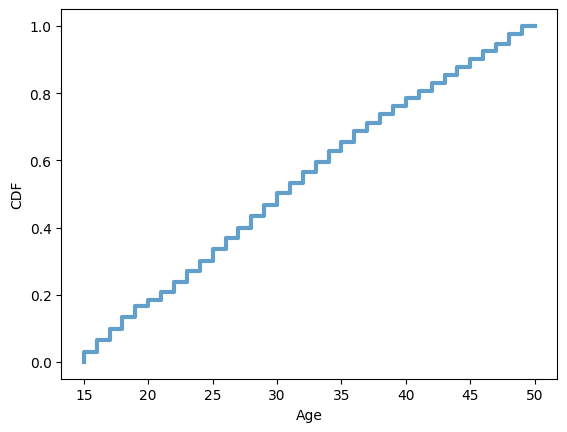

In [104]:
thinkplot.Cdf(Cdf(resp10.age))
thinkplot.Config(xlabel='Age', ylabel='CDF')

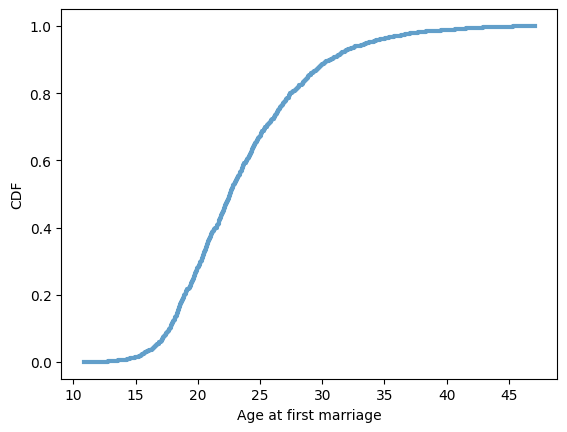

In [105]:
thinkplot.Cdf(Cdf(resp10.agemarry))
thinkplot.Config(xlabel='Age at first marriage', ylabel='CDF')

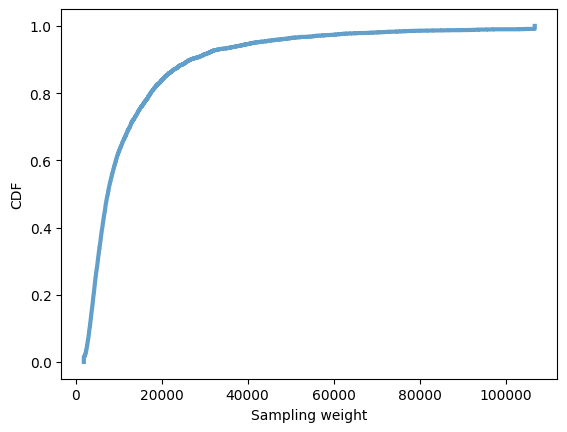

In [106]:
thinkplot.Cdf(Cdf(resp10.finalwgt))
thinkplot.Config(xlabel='Sampling weight', ylabel='CDF')

Validating 2019 data for marriage analysis

In [107]:
resp11 = marriage.ReadFemResp2019()

marriage.Validate2019(resp11)

In [108]:
resp11.shape

(6141, 30)

In [109]:
sum(resp11.evrmarry)

2722

In [110]:
resp11.agemarry.value_counts().max()

29

In [111]:
resp11.head()

,caseid,evrmarry,ager,rmarital,parity,fmarno,mardat01,mardat02,mardat03,mardat04,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,80716,False,35,6,0,0,NaN,NaN,NaN,NaN,...,False,4472.687899,11,NaN,35.0,False,84,35.0,NaN,80
1,80718,False,30,6,0,0,NaN,NaN,NaN,NaN,...,False,25114.995443,11,NaN,30.0,False,87,30.0,NaN,80
2,80719,False,30,6,5,0,NaN,NaN,NaN,NaN,...,False,1340.862000,11,NaN,30.0,False,88,30.0,NaN,80
3,80720,True,32,1,2,1,2010.0,NaN,NaN,NaN,...,True,7092.581524,11,22.583333,32.0,False,87,32.0,22.0,80
4,80723,True,27,4,3,1,2011.0,NaN,NaN,NaN,...,False,9607.322007,11,19.500000,27.0,False,91,27.0,19.0,90


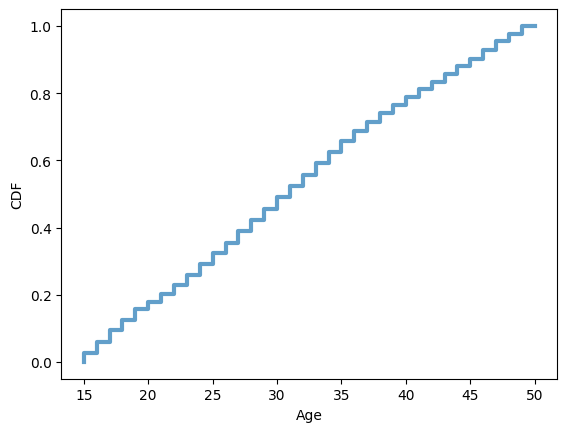

In [112]:
thinkplot.Cdf(Cdf(resp11.age))
thinkplot.Config(xlabel='Age', ylabel='CDF')

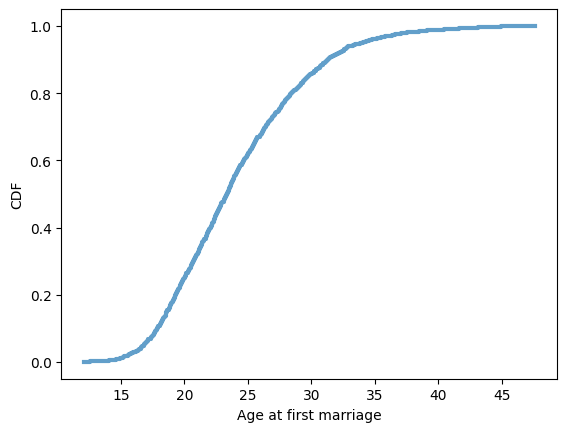

In [113]:
thinkplot.Cdf(Cdf(resp11.agemarry))
thinkplot.Config(xlabel='Age at first marriage', ylabel='CDF')

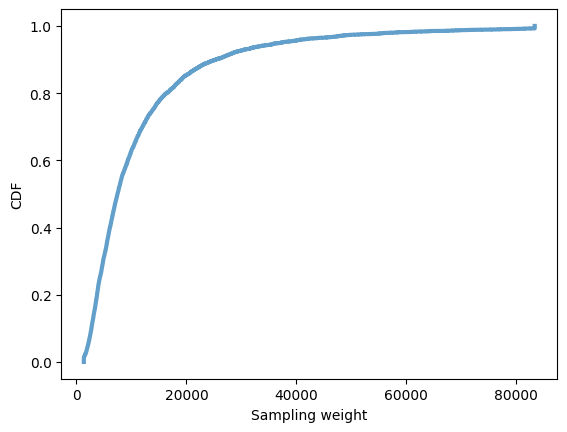

In [114]:
thinkplot.Cdf(Cdf(resp11.finalwgt))
thinkplot.Config(xlabel='Sampling weight', ylabel='CDF')

Make a list of DataFrames, one for each cycle:

In [115]:
resps = [resp11, resp10, resp9, resp8, resp7, resp6, resp5, resp4, resp3]
#resps = [resp11]

Make a table showing the number of respondents in each cycle:

In [116]:
def SummarizeCycle(df):
    ages = df.age.min(), df.age.max()
    ages= np.array(ages)
    
    intvws = df.cmintvw.min(), df.cmintvw.max()
    intvws = np.array(intvws) / 12 + 1900
    
    births = df.cmbirth.min(), df.cmbirth.max()
    births = np.array(births) / 12 + 1900

    print('# & ', intvws.astype(int), '&', len(df), '&', births.astype(int), r'\\')
    
for resp in reversed(resps):
    SummarizeCycle(resp)

# &  [1982 1983] & 7969 & [1937 1968] \\
# &  [1988 1988] & 8450 & [1943 1973] \\
# &  [1995 1995] & 10847 & [1950 1980] \\
# &  [2002 2003] & 7643 & [1957 1988] \\
# &  [2006 2010] & 12279 & [1961 1995] \\
# &  [2011 2013] & 5601 & [1966 1998] \\
# &  [2013 2015] & 5699 & [1968 2000] \\
# &  [2015 2017] & 5554 & [1966 2002] \\
# &  [2017 2019] & 6141 & [1968 2004] \\


Check for missing values in `agemarry`:

In [117]:
def CheckAgeVars(df):
    print(sum(df[df.evrmarry].agemarry.isnull()))
    
for resp in resps:
    CheckAgeVars(resp)

0
0
11
17
16
37
0
22
0


Combine the DataFrames (but remember that this is not resampled properly):

In [118]:
df = pd.concat(resps, ignore_index=True, sort=False)
len(df)

70183

Double check missing data:

In [119]:
sum(df.missing)

103

Generate a table with the number of respondents in each cohort:

In [120]:
marriage.DigitizeResp(df)
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.age.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

30 & 325 & 42 -- 45 & 310 & 0 \\
40 & 3608 & 32 -- 45 & 3287 & 9 \\
50 & 10631 & 22 -- 45 & 8667 & 18 \\
60 & 15064 & 15 -- 50 & 8902 & 33 \\
70 & 16466 & 14 -- 49 & 9185 & 30 \\
80 & 14318 & 14 -- 39 & 5331 & 13 \\
90 & 8539 & 15 -- 29 & 915 & 0 \\
100 & 1232 & 15 -- 19 & 2 & 0 \\


In [121]:
df.to_hdf('FemMarriageData.hdf', 'FemMarriageData')

In [122]:
%time nsfg_female = pd.read_hdf('FemMarriageData.hdf', 'FemMarriageData')

CPU times: user 37.5 ms, sys: 4.18 ms, total: 41.7 ms
Wall time: 39.7 ms


## Male data

In [123]:
import marriage

male2019 = marriage.ReadMaleResp2019()
male2019.head()

,caseid,evrmarry,ager,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2017_2019,cmintvw,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,80717,False,31,2,0,NaN,NaN,NaN,11403.609947,1423,...,False,11403.609947,11,NaN,31.0,False,87,31.0,NaN,80
1,80721,False,17,6,0,NaN,NaN,NaN,12669.986089,1421,...,False,12669.986089,11,NaN,17.0,False,101,17.0,NaN,100
2,80722,False,16,6,0,NaN,NaN,NaN,4318.981209,1430,...,False,4318.981209,11,NaN,16.0,False,103,16.0,NaN,100
3,80724,True,49,4,2,2013.0,1.0,2.0,3872.331010,1433,...,False,3872.331010,11,42.583333,49.0,False,70,49.0,42.0,70
4,80732,False,39,6,0,NaN,NaN,NaN,6390.223031,1433,...,False,6390.223031,11,NaN,39.0,False,80,39.0,NaN,80


In [124]:
male2019.agemarry.describe()

count    1961.000000
mean       25.952490
std         5.470129
min        12.500000
25%        21.833333
50%        25.166667
75%        28.916667
max        45.833333
Name: agemarry, dtype: float64

In [125]:
male2019.age.describe()

count    5206.000000
mean       30.547445
std        10.012382
min        15.000000
25%        22.000000
50%        30.000000
75%        39.000000
max        50.000000
Name: age, dtype: float64

In [126]:
male2019.missing.describe()

count      5206
unique        1
top       False
freq       5206
Name: missing, dtype: object

In [127]:
male2019.year.describe()

count    5206.000000
mean       87.688821
std        10.044893
min        68.000000
25%        80.000000
50%        88.000000
75%        96.000000
max       104.000000
Name: year, dtype: float64

In [128]:
male2017 = marriage.ReadMaleResp2017()
male2017.head()

,caseid,evrmarry,ager,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2015_2017,cmintvw,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,70622,True,29,1,1,2016.0,NaN,1.0,11801.703471,1399,...,True,11801.703471,10,28.416667,29.0,False,87,29.0,28.0,80
1,70626,False,18,6,0,NaN,NaN,NaN,5153.910962,1391,...,False,5153.910962,10,NaN,18.0,False,97,18.0,NaN,90
2,70629,False,23,6,0,NaN,NaN,NaN,10293.100099,1405,...,False,10293.100099,10,NaN,23.0,False,94,23.0,NaN,90
3,70631,False,17,6,0,NaN,NaN,NaN,14236.029179,1403,...,False,14236.029179,10,NaN,17.0,False,99,17.0,NaN,90
4,70636,False,37,6,0,NaN,NaN,NaN,11320.650257,1393,...,False,11320.650257,10,NaN,37.0,False,79,37.0,NaN,70


In [129]:
male2017.agemarry.describe()

count    1770.000000
mean       25.683663
std         5.292507
min        13.166667
25%        21.750000
50%        24.833333
75%        28.833333
max        47.000000
Name: agemarry, dtype: float64

In [130]:
male2017.age.describe()

count    4540.000000
mean       30.455286
std        10.145992
min        15.000000
25%        21.000000
50%        30.000000
75%        39.000000
max        50.000000
Name: age, dtype: float64

In [131]:
male2017.missing.describe()

count      4540
unique        1
top       False
freq       4540
Name: missing, dtype: object

In [132]:
male2017.year.describe()

count    4540.000000
mean       85.779515
std        10.162161
min        65.000000
25%        77.000000
50%        86.000000
75%        95.000000
max       102.000000
Name: year, dtype: float64

In [133]:
male2002 = marriage.ReadMaleResp2002()
male2002.head()

,caseid,cmbirth,timesmar,fmarit,evrmarry,marrend4,cmdivw,mardat01,finalwgt,cmintvw,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,12178,1052,NaN,5,False,NaN,NaN,NaN,7085.207973,1233,...,False,False,6,NaN,15.083333,False,87,15.0,NaN,80
1,3233,701,1.0,1,True,NaN,NaN,1007.0,24372.450063,1237,...,False,True,6,25.500000,44.666667,False,58,44.0,25.0,50
2,12170,707,1.0,1,True,NaN,NaN,1199.0,7073.132109,1234,...,False,True,6,41.000000,43.916667,False,58,43.0,41.0,50
3,6629,1052,NaN,5,False,NaN,NaN,NaN,3105.158992,1234,...,False,False,6,NaN,15.166667,False,87,15.0,NaN,80
4,6531,787,1.0,3,True,NaN,NaN,1107.0,4679.548824,1235,...,False,False,6,26.666667,37.333333,False,65,37.0,26.0,60


In [134]:
sum(male2002.divorced) + sum(male2002.separated) + sum(male2002.widowed) 

576

In [135]:
sum(male2002.evrmarry)

1752

In [136]:
male2010 = marriage.ReadMaleResp2010()
male2010.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgtq1q16,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,36133,1043,False,NaN,6,0,NaN,NaN,NaN,7270.577055,...,False,7270.577055,7,NaN,23.333333,False,86,23.0,NaN,80
1,36636,1021,False,NaN,6,0,NaN,NaN,NaN,7601.733277,...,False,7601.733277,7,NaN,25.083333,False,85,25.0,NaN,80
2,41125,1118,False,NaN,6,0,NaN,NaN,NaN,4587.699601,...,False,4587.699601,7,NaN,17.000000,False,93,17.0,NaN,90
3,23607,948,False,NaN,6,0,NaN,NaN,NaN,26566.111007,...,False,26566.111007,7,NaN,28.250000,False,78,28.0,NaN,70
4,40814,1018,False,NaN,2,0,NaN,NaN,NaN,5709.710317,...,False,5709.710317,7,NaN,25.333333,False,84,25.0,NaN,80


In [137]:
male2013 = marriage.ReadMaleResp2013()
male2013.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2011_2013,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,50001,1027,True,1346.0,4,1,1237.0,1.0,87.0,8111.081751,...,False,8111.081751,8,17.500000,26.750000,False,85,26.0,17.0,80
1,50003,1160,False,NaN,6,0,NaN,NaN,NaN,4082.414347,...,False,4082.414347,8,NaN,16.166667,False,96,16.0,NaN,90
2,50006,1025,True,NaN,1,1,1335.0,NaN,25.0,25550.455475,...,True,25550.455475,8,25.833333,27.916667,False,85,27.0,25.0,80
3,50007,1028,False,NaN,6,0,NaN,NaN,NaN,6754.912773,...,False,6754.912773,8,NaN,26.666667,False,85,26.0,NaN,80
4,50009,855,True,NaN,1,1,1152.0,NaN,210.0,49442.342886,...,True,49442.342886,8,24.750000,42.250000,False,71,42.0,24.0,70


In [138]:
male2015 = marriage.ReadMaleResp2015()
male2015.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2013_2015,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60417,926,False,NaN,2,0,NaN,NaN,NaN,7693.012917,...,False,7693.012917,9,NaN,37.750000,False,77,37.0,NaN,70
1,60421,1161,False,NaN,6,0,NaN,NaN,NaN,9643.271157,...,False,9643.271157,9,NaN,18.000000,False,96,18.0,NaN,90
2,60422,980,False,NaN,2,0,NaN,NaN,NaN,9650.615384,...,False,9650.615384,9,NaN,33.000000,False,81,33.0,NaN,80
3,60424,990,True,NaN,4,1,1326.0,1.0,45.0,11590.039167,...,False,11590.039167,9,28.000000,32.166667,False,82,32.0,28.0,80
4,60425,1143,True,NaN,1,1,1376.0,NaN,7.0,6864.914673,...,True,6864.914673,9,19.416667,20.000000,False,95,20.0,19.0,90


In [139]:
import pandas as pd

males = [male2002, male2010, male2013, male2015, male2017, male2019]
df2 = pd.concat(males, ignore_index=True, sort=False)
len(df2)

34398

In [140]:
sum(df2.missing)

0

In [141]:
marriage.DigitizeResp(df2)
grouped = df2.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.age.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

50 & 322 & 42 -- 45 & 224 & 0 \\
60 & 4071 & 32 -- 50 & 2827 & 0 \\
70 & 9476 & 22 -- 49 & 5743 & 0 \\
80 & 11421 & 15 -- 39 & 3259 & 0 \\
90 & 7856 & 15 -- 29 & 457 & 0 \\
100 & 1252 & 15 -- 19 & 1 & 0 \\


In [142]:
df2['complete'] = df2.evrmarry
df2['complete_var'] = df2.agemarry_index
df2['ongoing_var'] = df2.age_index
df2['complete_missing'] = df2.complete & df2.complete_var.isnull()
df2['ongoing_missing'] = ~df2.complete & df2.ongoing_var.isnull()

In [143]:
print(sum(df2.complete_missing), sum(df2.ongoing_missing))

0 0


In [144]:
df2.to_hdf('MaleMarriageData.hdf', 'MaleMarriageData')

In [145]:
%time nsfg_male = pd.read_hdf('MaleMarriageData.hdf', 'MaleMarriageData')

CPU times: user 17.1 ms, sys: 81 µs, total: 17.1 ms
Wall time: 16.1 ms
